In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\ASUS\Desktop\ML TEMPLETES\hands-on-time-series-analylsis-python-master\Data\Dow_Jones_Industrial_Average.csv', parse_dates= True)

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-14,16159.009766,16482.050781,16075.120117,16379.049805,16379.049805,158830000
1,2016-01-15,16354.330078,16354.330078,15842.110352,15988.080078,15988.080078,239210000
2,2016-01-19,16009.450195,16171.959961,15900.250000,16016.019531,16016.019531,144360000
3,2016-01-20,15989.450195,15989.450195,15450.559570,15766.740234,15766.740234,191870000
4,2016-01-21,15768.870117,16038.589844,15704.660156,15882.679688,15882.679688,145140000
5,2016-01-22,15921.099609,16136.790039,15921.099609,16093.509766,16093.509766,145850000
6,2016-01-25,16086.459961,16086.459961,15880.150391,15885.219727,15885.219727,123250000
7,2016-01-26,15893.160156,16185.790039,15893.160156,16167.230469,16167.230469,118210000
8,2016-01-27,16168.740234,16235.030273,15878.299805,15944.459961,15944.459961,138350000
9,2016-01-28,15960.280273,16102.139648,15863.719727,16069.639648,16069.639648,130120000


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,22866.938142,22966.958599,22762.982503,22872.963590,22872.963590,2.684218e+08
std,3439.607798,3455.304618,3420.907109,3436.008137,3436.008137,1.354611e+08
min,15691.620117,15897.820313,15450.559570,15660.179688,15660.179688,4.589000e+07
25%,19912.694336,19954.347656,19838.519531,19902.269532,19902.269532,2.073000e+08
50%,24004.490235,24230.825195,23788.514649,24013.025390,24013.025390,2.738850e+08
75%,25733.759278,25882.343262,25575.344726,25742.652344,25742.652344,3.327800e+08
max,28977.519531,29009.070313,28844.310547,28956.900391,28956.900391,2.190810e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1006 non-null   object 
 1   Open       1006 non-null   float64
 2   High       1006 non-null   float64
 3   Low        1006 non-null   float64
 4   Close      1006 non-null   float64
 5   Adj Close  1006 non-null   float64
 6   Volume     1006 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.1+ KB


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df.count()

Date         1006
Open         1006
High         1006
Low          1006
Close        1006
Adj Close    1006
Volume       1006
dtype: int64

In [8]:
df = df[(df['Date'] > '2016-01-14') & (df['Date'] <= '2017-01-30')]

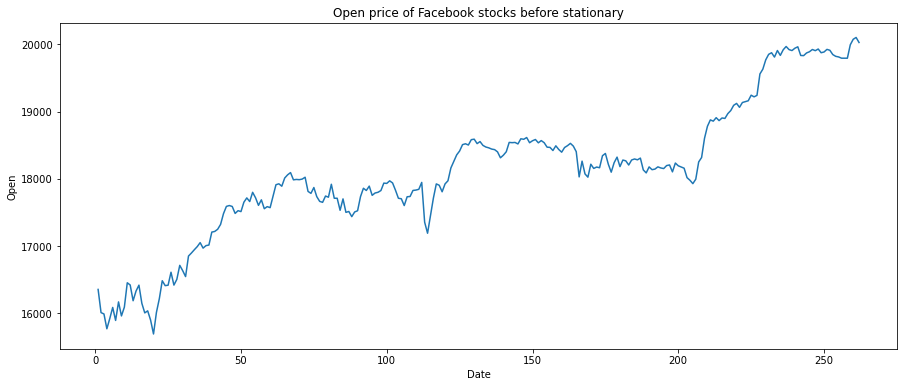

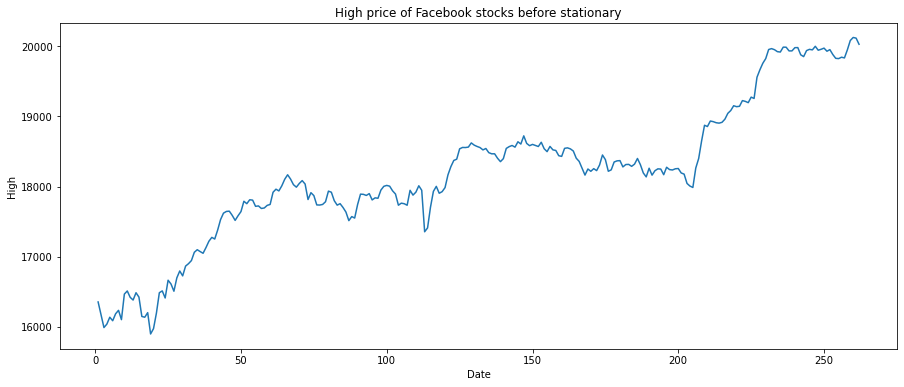

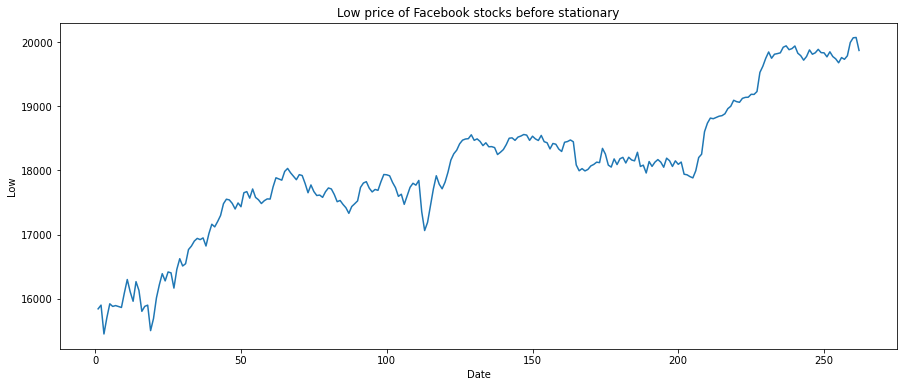

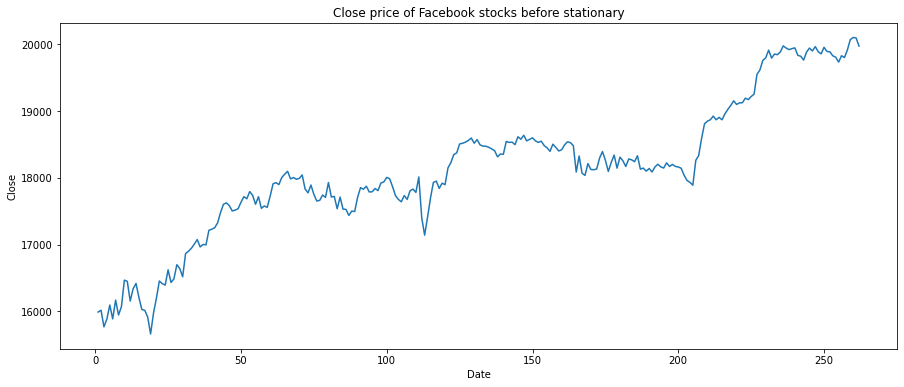

In [9]:
for c in df[['Open', 'High', 'Low', 'Close']]:
    df[str(c)].plot(figsize=(15, 6))
    plt.xlabel("Date")
    plt.ylabel(c)
    plt.title(f"{str(c)} price of Facebook stocks before stationary")
    plt.show()

In [10]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [11]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [12]:
for name, column in df[['Open', 'High', 'Low', 'Close']].iteritems():
    Augmented_Dickey_Fuller_Test_func(df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: Open
Test Statistic                  -0.776223
p-value                          0.826007
No Lags Used                     0.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: High
Test Statistic                  -1.240162
p-value                          0.656085
No Lags Used                     2.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: Low
Test Statistic                  -0.981046
p-value                          0.760114
No L

In [13]:
X = df[['Open', 'High', 'Low', 'Close' ]]
train, test = X[0:-30], X[-30:]

In [14]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [15]:
for name, column in train_diff[['Open', 'High', 'Low', 'Close' ]].iteritems():
    Augmented_Dickey_Fuller_Test_func(train_diff[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: Open
Test Statistic                -1.579687e+01
p-value                        1.085613e-28
No Lags Used                   0.000000e+00
Number of Observations Used    2.300000e+02
Critical Value (1%)           -3.459106e+00
Critical Value (5%)           -2.874190e+00
Critical Value (10%)          -2.573512e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: High
Test Statistic                -1.172782e+01
p-value                        1.364178e-21
No Lags Used                   1.000000e+00
Number of Observations Used    2.290000e+02
Critical Value (1%)           -3.459233e+00
Critical Value (5%)           -2.874245e+00
Critical Value (10%)          -2.573541e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: Low
Test Statistic                  -3.997846
p-value                          0.001422


In [16]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df): 
    res = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1
    cvts = res.cvt[:, d[str(1-0.05)]]
    def adjust(val, length= 6): 
        return str(val).ljust(length)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [17]:
cointegration_test(train_diff[['Open', 'High', 'Low', 'Close']])

Column Name   >  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Open   >  311.57    > 40.1749   =>   True
High   >  201.62    > 24.2761   =>   True
Low    >  102.52    > 12.3212   =>   True
Close  >  32.21     > 4.1296    =>   True


# VARMA with Auto ARIMA

In [ ]:
from pmdarima import auto_arima

In [19]:
pq = []
for name, column in train_diff[[ 'Open', 'High', 'Low', 'Close'  ]].iteritems():
    print(f'Searching order of p and q for : {name}')
    stepwise_model = auto_arima(train_diff[name],start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)
    parameter = stepwise_model.get_params().get('order')
    print(f'optimal order for:{name} is: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))

Searching order of p and q for : Open
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2891.139, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2887.158, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2889.136, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2889.135, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2885.680, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2887.514, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2887.501, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2889.092, Time=0.33 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.875 seconds
optimal order for:Open is: (0, 0, 0) 


Searching order of p and q for : High
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2806.440, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2811.486, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2808.164, Time=0.05

In [20]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns: 
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res


In [21]:
pq

[(0, 0, 0), (0, 0, 2), (0, 0, 2), (0, 0, 1)]

In [22]:

df_results_moni = pd.DataFrame(columns=['p', 'q','RMSE Open','RMSE High','RMSE Low','RMSE Close'])
print('Grid Search Started')
start = timer()
for i in pq:
    if i[0]== 0 and i[2] ==0:
        pass
    else:
        print(f' Running for {i}')
        model = VARMAX(train_diff[[ 'Open', 'High', 'Low', 'Close'   ]], order=(i[0],i[2])).fit( disp=False)
        result = model.forecast(steps = 30)
        inv_res = inverse_diff(df[[ 'Open', 'High', 'Low', 'Close'   ]] , result)
        Opensrmse = np.sqrt(metrics.mean_squared_error(test['Open'], inv_res.Open_1st_inv_diff))
        Highrmse = np.sqrt(metrics.mean_squared_error(test['High'], inv_res.High_1st_inv_diff))
        Lowrmse = np.sqrt(metrics.mean_squared_error(test['Low'], inv_res.Low_1st_inv_diff))
        Closermse = np.sqrt(metrics.mean_squared_error(test['Close'], inv_res.Close_1st_inv_diff))
        df_results_moni = df_results_moni.append({'p': i[0], 'q': i[2], 'RMSE Open':Opensrmse,'RMSE High':Highrmse,'RMSE Low':Lowrmse,'RMSE Close':Closermse }, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')

Grid Search Started
 Running for (0, 0, 2)
 Running for (0, 0, 2)
 Running for (0, 0, 1)
 Total time taken to complete grid search in seconds: 26.206716799999867


In [23]:
df_results_moni.sort_values(by = ['RMSE Open','RMSE High','RMSE Low','RMSE Close'] )

,p,q,RMSE Open,RMSE High,RMSE Low,RMSE Close
0,0.0,2.0,263.232914,190.705965,286.670713,318.983739
1,0.0,2.0,263.232914,190.705965,286.670713,318.983739
2,0.0,1.0,314.022498,209.762446,336.622877,345.644222


In [24]:
# from above example we can see that p=0 and q=2 gives least RMSE
model = VARMAX(train_diff[[ 'Open', 'High', 'Low', 'Close' ]], order=(0,2)).fit( disp=False)
result = model.forecast(steps = 30)

In [25]:
res = inverse_diff(df[['Open', 'High', 'Low', 'Close' ]],result)

In [26]:
res

,Open,High,Low,Close,Open_1st_inv_diff,High_1st_inv_diff,Low_1st_inv_diff,Close_1st_inv_diff
231,-97.554903,-125.387633,-18.183281,-4.544513,19931.064238,19903.231508,19852.207344,19966.586346
232,-13.766612,-35.737286,-2.289675,-7.063497,19917.297627,19867.494222,19849.917668,19959.522849
233,15.363201,15.536704,16.851181,16.495431,19932.660827,19883.030926,19866.768850,19976.018280
234,15.363201,15.536704,16.851181,16.495431,19948.024028,19898.567629,19883.620031,19992.513710
235,15.363201,15.536704,16.851181,16.495431,19963.387229,19914.104333,19900.471212,20009.009141
236,15.363201,15.536704,16.851181,16.495431,19978.750429,19929.641037,19917.322393,20025.504571
237,15.363201,15.536704,16.851181,16.495431,19994.113630,19945.177741,19934.173574,20042.000002
238,15.363201,15.536704,16.851181,16.495431,20009.476831,19960.714445,19951.024756,20058.495433
239,15.363201,15.536704,16.851181,16.495431,20024.840031,19976.251149,19967.875937,20074.990863
240,15.363201,15.536704,16.851181,16.495431,20040.203232,19991.787853,19984.727118,20091.486294


In [27]:
for i in ['Open', 'High', 'Low', 'Close' ]:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)] , res[str(i)+'_1st_inv_diff'])

Evaluation metric for Open
Evaluation metric results:-
MSE is : 69291.56707711238
MAE is : 224.1783060284193
RMSE is : 263.2329141219091
MAPE is : 1.1274489979508298
R2 is : -10.334973033508911

Evaluation metric for High
Evaluation metric results:-
MSE is : 36368.765111996116
MAE is : 152.8555564017725
RMSE is : 190.7059650666337
MAPE is : 0.7671342505857387
R2 is : -5.53465270210015

Evaluation metric for Low
Evaluation metric results:-
MSE is : 82180.09777175394
MAE is : 238.74186215774378
RMSE is : 286.67071313922867
MAPE is : 1.2049084160301156
R2 is : -8.623361222867945

Evaluation metric for Close
Evaluation metric results:-
MSE is : 101750.6258063035
MAE is : 282.7284255462854
RMSE is : 318.9837390938659
MAPE is : 1.4219422854948653
R2 is : -12.431135480447901



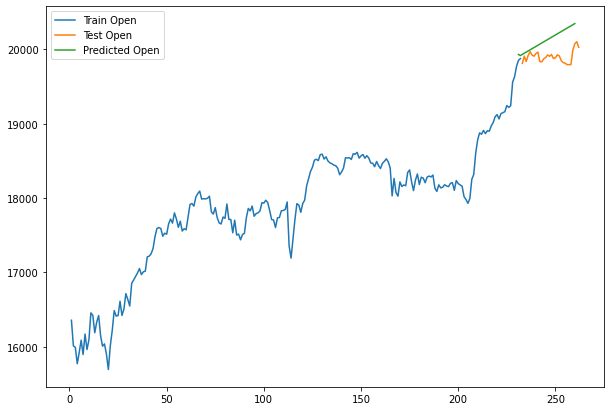

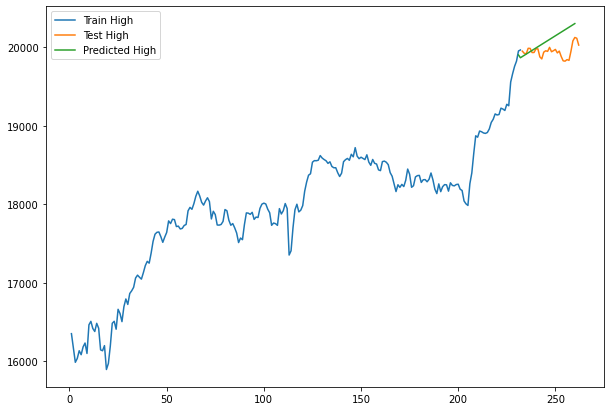

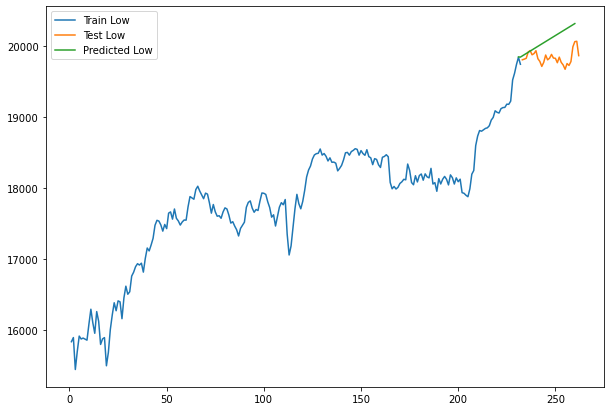

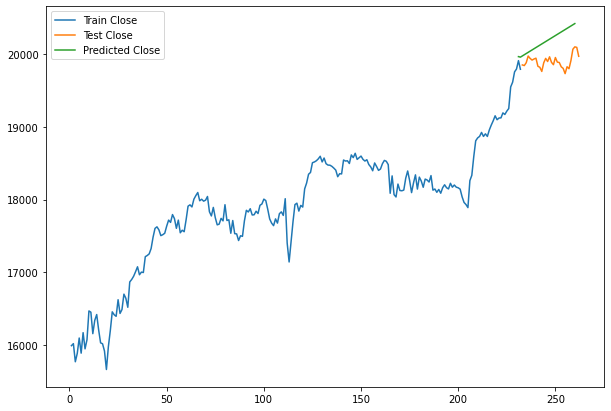

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in ['Open', 'High', 'Low', 'Close' ]:
    
    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot( train[str(i)], label='Train '+str(i))
    plt.plot(test[str(i)], label='Test '+str(i))
    plt.plot(res[str(i)+'_1st_inv_diff'], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()